Found 20 binarized images.


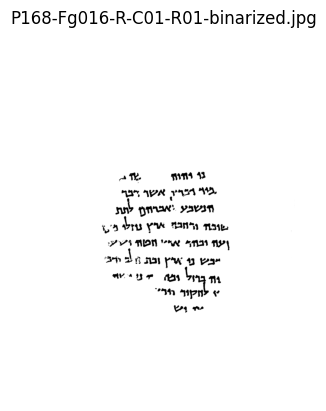

In [333]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Set the directory path
directory = r"C:\Users\Gebruiker\Documents\CCS\DLP\Seg_Images\image-data"

# Find all files ending with 'binarized.jpg'
binarized_images = [f for f in os.listdir(directory) if f.endswith("binarized.jpg")]

# Count
print(f"Found {len(binarized_images)} binarized images.")

# Display them in the notebook
if binarized_images:
    filename = binarized_images[5]
    image_path = os.path.join(directory, filename)
    img = Image.open(image_path)

    plt.imshow(img, cmap='gray')
    plt.title(filename)
    plt.axis('off')
    plt.show()
else:
    print("No binarized images found.")



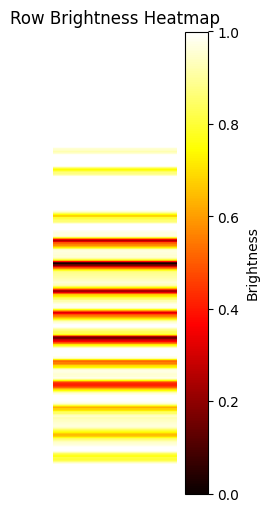

In [114]:
import numpy as np

def row_brightness_heatmap(image_path):
    # Load and convert to grayscale
    img = Image.open(image_path).convert("L")  # 'L' = 8-bit pixels, black and white
    img_array = np.array(img)

    # Sum pixel values across each row
    row_sums = img_array.sum(axis=1)  # Sum along width (axis 1)

    # Normalize row sums to [0, 1]
    row_sums_normalized = (row_sums - row_sums.min()) / (row_sums.ptp() + 1e-8)

    # Show as heatmap
    plt.figure(figsize=(2, 6))  # Tall figure
    plt.imshow(row_sums_normalized[:, np.newaxis], cmap='hot', aspect='auto')
    plt.title("Row Brightness Heatmap")
    plt.axis('off')
    plt.colorbar(label='Brightness')
    plt.show()

    return row_sums  # Optionally return raw row sums
image_path = os.path.join(directory, binarized_images[0])
row_sums = row_brightness_heatmap(image_path)


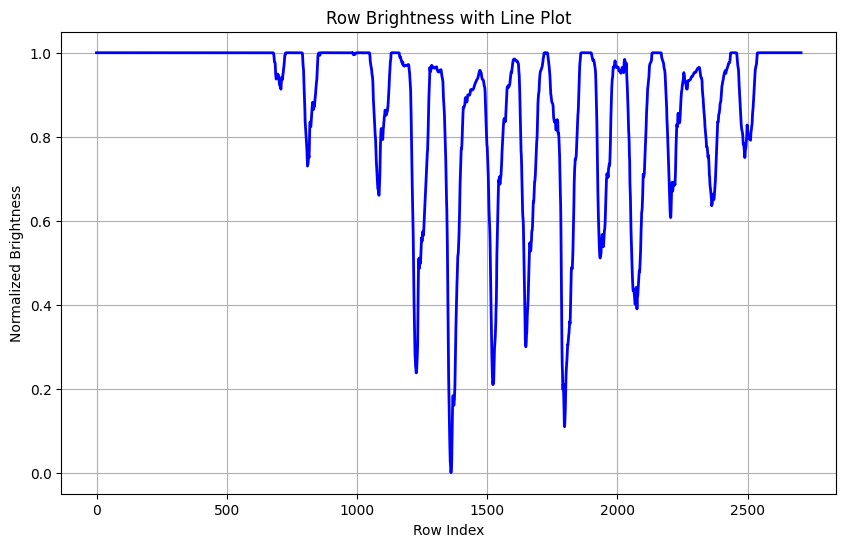

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

def row_brightness_heatmap_as_line(image_path):
    # Load and convert to grayscale
    img = Image.open(image_path).convert("L")  # 'L' = 8-bit pixels, black and white
    img_array = np.array(img)

    # Sum pixel values across each row
    row_sums = img_array.sum(axis=1)  # Sum along width (axis 1)

    # Normalize row sums to [0, 1]
    row_sums_normalized = (row_sums - row_sums.min()) / (row_sums.ptp() + 1e-8)

    # Create a line plot of row sums (brightness)
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(row_sums_normalized)), row_sums_normalized, label="Normalized Brightness", color='blue', linewidth=2)
    plt.title("Row Brightness with Line Plot")
    plt.xlabel("Row Index")
    plt.ylabel("Normalized Brightness")
    plt.grid(True)
    plt.show()

    return row_sums

# Usage
image_path = os.path.join(directory, binarized_images[0])
row_sums = row_brightness_heatmap_as_line(image_path)


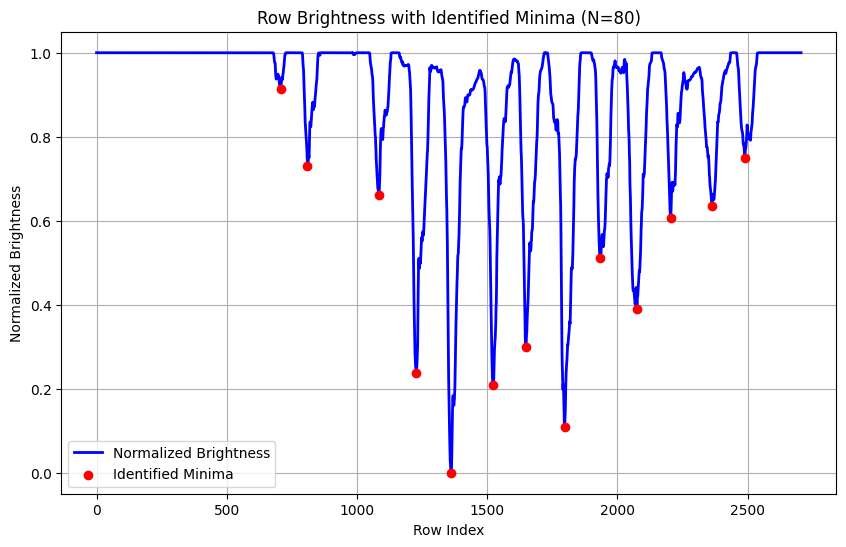

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

def find_minima_and_clusters(image_path, N=5):
    # Load and convert to grayscale
    img = Image.open(image_path).convert("L")  # 'L' = 8-bit pixels, black and white
    img_array = np.array(img)

    # Sum pixel values across each row
    row_sums = img_array.sum(axis=1)  # Sum along width (axis 1)

    # Normalize row sums to [0, 1]
    row_sums_normalized = (row_sums - row_sums.min()) / (row_sums.ptp() + 1e-8)

    # Find minima based on the surrounding N rows
    minima = []
    for i in range(N, len(row_sums_normalized) - N):
        # Check if current point is a local minima
        is_minima = all(row_sums_normalized[i] < row_sums_normalized[i-j] for j in range(1, N+1)) and \
                    all(row_sums_normalized[i] < row_sums_normalized[i+j] for j in range(1, N+1))
        if is_minima:
            minima.append(i)

    # Plotting the normalized brightness and the identified minima
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(row_sums_normalized)), row_sums_normalized, label="Normalized Brightness", color='blue', linewidth=2)
    plt.scatter(minima, row_sums_normalized[minima], color='red', label='Identified Minima', zorder=5)
    plt.title(f"Row Brightness with Identified Minima (N={N})")
    plt.xlabel("Row Index")
    plt.ylabel("Normalized Brightness")
    plt.grid(True)
    plt.legend()
    plt.show()

    return row_sums_normalized, minima

# Usage
image_path = os.path.join(directory, binarized_images[0])
row_sums_normalized, minima = find_minima_and_clusters(image_path, N=80)  # Tweak N to change sensitivity


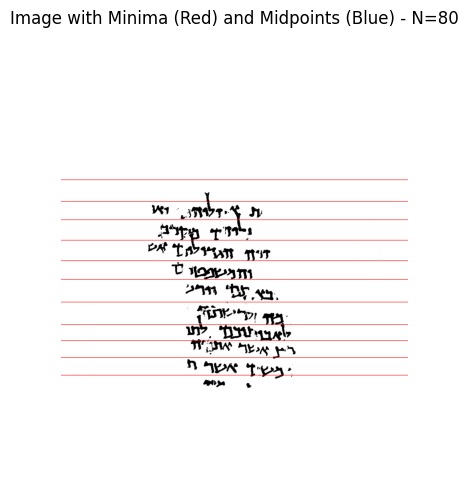

In [423]:
import os
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

def find_minima_and_draw_all_lines(image_path, N=80):
    """Find minima and draw red lines at minima and blue lines between them."""
    # Load the original image
    img = Image.open(image_path).convert("L")  # 'L' = 8-bit pixels, black and white
    img_array = np.array(img)
    
    # Sum pixel values across each row
    row_sums = img_array.sum(axis=1)  # Sum along width (axis 1)
    
    # Normalize row sums to [0, 1]
    row_sums_normalized = (row_sums - row_sums.min()) / (row_sums.ptp() + 1e-8)
    
    # Find minima based on the surrounding N rows
    minima = []
    for i in range(N, len(row_sums_normalized) - N):
        # Check if current point is a local minima
        is_minima = all(row_sums_normalized[i] < row_sums_normalized[i-j] for j in range(1, N+1)) and \
                    all(row_sums_normalized[i] < row_sums_normalized[i+j] for j in range(1, N+1))
        if is_minima:
            minima.append(i)
    
    # Convert to RGB mode before drawing colored lines
    img_with_lines = img.convert("RGB")
    draw = ImageDraw.Draw(img_with_lines)
    
    # Draw red lines on the identified minima rows
    #for i in minima:
     #   draw.line([(0, i), (img.width, i)], fill=(0, 0, 255), width=2)  # Red in RGB
    
    # Draw blue lines in between minima
    if len(minima) >= 2:
        for i in range(len(minima) - 1):
            # Calculate the midpoint between two minima
            midpoint = (minima[i] + minima[i+1]) // 2
            # Draw a blue line at the midpoint
            draw.line([(0, midpoint), (img.width, midpoint)], fill=(255, 0, 0), width=4)  # Blue in RGB
    
    # Plot the original image with all lines
    plt.figure(figsize=(10, 6))
    plt.imshow(img_with_lines)  # No colormap needed for RGB images
    plt.title(f"Image with Minima (Red) and Midpoints (Blue) - N={N}")
    plt.axis('off')  # Turn off axis for cleaner visualization
    plt.show()
    
    return img_with_lines, minima

# Directory and file setup
directory = r"C:\Users\Gebruiker\Documents\CCS\DLP\Seg_Images\image-data"
binarized_images = [f for f in os.listdir(directory) if f.endswith("binarized.jpg")]


# Process image of choice
image_path = os.path.join(directory, binarized_images[6])
img_with_lines, minima = find_minima_and_draw_all_lines(image_path, N=80)



Found 429 connected black pixel clusters


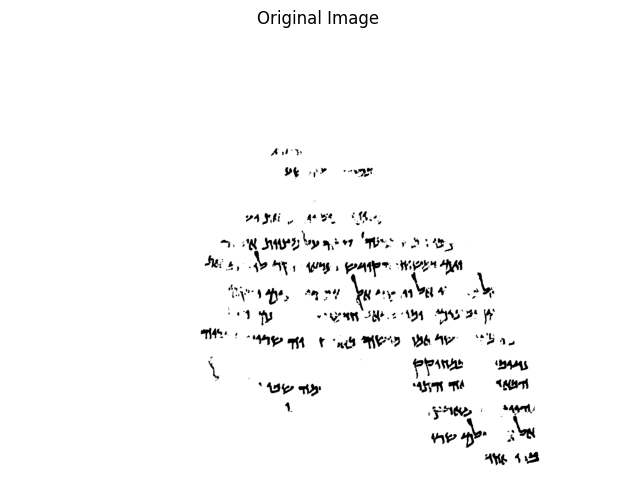

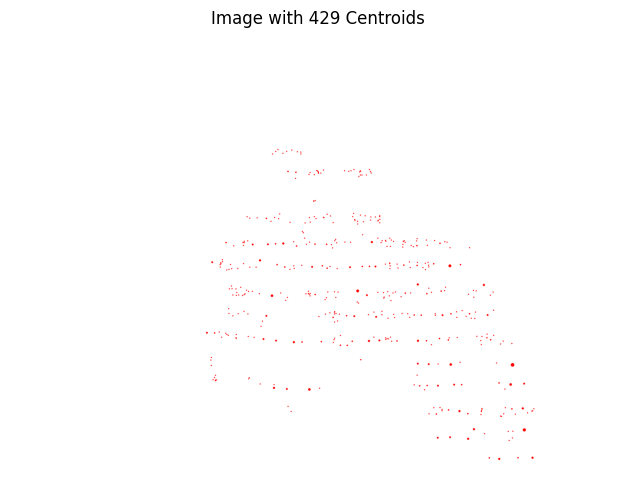

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import os
from scipy import ndimage

def find_connected_components_and_centroids(image_path):
    """
    Find all connected black pixel clusters in a binary image and mark their centroids.
    
    Parameters:
    image_path (str): Path to the binarized image
    
    Returns:
    PIL.Image: Image with centroids marked as red dots
    list: List of centroids (row, column) coordinates
    """
    # Load the image
    img = Image.open(image_path).convert("L")
    img_array = np.array(img)
    
    # Make sure black pixels are 1 and white pixels are 0 for connected component analysis
    binary_array = (img_array < 128).astype(np.int32)  # Convert to binary (black = 1, white = 0)
    
    # Find connected components
    labeled_array, num_features = ndimage.label(binary_array)
    print(f"Found {num_features} connected black pixel clusters")
    
    # Calculate centroids and the size of each component
    centroids = []
    sizes = []  # List to store the sizes (number of pixels) of each component
    for i in range(1, num_features + 1):
        coords = np.where(labeled_array == i)
        if len(coords[0]) > 0:  # Ensure there are pixels in this component
            # Calculate centroid
            y_centroid = int(np.mean(coords[0]))
            x_centroid = int(np.mean(coords[1]))
            centroids.append((y_centroid, x_centroid))
            sizes.append(len(coords[0]))  # Store the size of the current component
    
    # Convert image to RGB for colored dots
    img_with_centroids = img.convert("RGB")
    draw = ImageDraw.Draw(img_with_centroids)
    
    # Normalize the size of the dots based on the component size
    max_size = max(sizes) if sizes else 1  # To avoid division by zero
    min_dot_size = 3  # Minimum dot size
    max_dot_size = 10  # Maximum dot size
    
    for centroid, size in zip(centroids, sizes):
        y, x = centroid
        # Scale dot size based on the number of pixels in the component
        dot_size = int(min_dot_size + (size / max_size) * (max_dot_size - min_dot_size))
        # Draw a filled circle at each centroid
        draw.ellipse([(x - dot_size, y - dot_size), (x + dot_size, y + dot_size)], fill=(255, 0, 0))
    
    # Create an empty black image to only show the dots
    black_img = Image.new("RGB", img.size, (255, 255, 255))
    draw_black = ImageDraw.Draw(black_img)
    
    # Draw red dots on the black image
    for centroid, size in zip(centroids, sizes):
        y, x = centroid
        dot_size = int(min_dot_size + (size / max_size) * (max_dot_size - min_dot_size))
        draw_black.ellipse([(x - dot_size, y - dot_size), (x + dot_size, y + dot_size)], fill=(255, 0, 0))
    
    # Display the original image
    plt.figure(figsize=(10, 6))
    plt.imshow(img, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    plt.show()
    
    # Display only the dots (black background with red dots)
    plt.figure(figsize=(10, 6))
    plt.imshow(black_img)
    plt.title(f"Image with {len(centroids)} Centroids")
    plt.axis('off')
    plt.show()
    
    return img_with_centroids, centroids

# Example usage
directory = r"C:\Users\Gebruiker\Documents\CCS\DLP\Seg_Images\image-data"
binarized_images = [f for f in os.listdir(directory) if f.endswith("binarized.jpg")]

# Process the first image (uncomment to run)
image_path = os.path.join(directory, binarized_images[0])
img_with_centroids, centroids = find_connected_components_and_centroids(image_path)

# To process another image, specify its index
# image_index = 1  # Change to the desired index
# image_path = os.path.join(directory, binarized_images[image_index])
# img_with_centroids, centroids = find_connected_components_and_centroids(image_path)


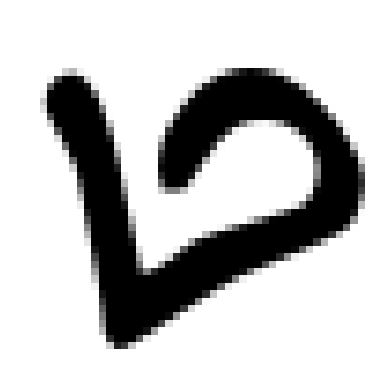

In [205]:
from PIL import Image, ImageFont, ImageDraw

#Load the font and set the font size to 42
font = ImageFont.truetype('C:/Users/Gebruiker/Documents/CCS/DLP/Habbakuk.TTF', 42)


#Character mapping for each of the 27 tokens
char_map = {'Alef' : ')', 
            'Ayin' : '(', 
            'Bet' : 'b', 
            'Dalet' : 'd', 
            'Gimel' : 'g', 
            'He' : 'x', 
            'Het' : 'h', 
            'Kaf' : 'k', 
            'Kaf-final' : '\\', 
            'Lamed' : 'l', 
            'Mem' : '{', 
            'Mem-medial' : 'm', 
            'Nun-final' : '}', 
            'Nun-medial' : 'n', 
            'Pe' : 'p', 
            'Pe-final' : 'v', 
            'Qof' : 'q', 
            'Resh' : 'r', 
            'Samekh' : 's', 
            'Shin' : '$', 
            'Taw' : 't', 
            'Tet' : '+', 
            'Tsadi-final' : 'j', 
            'Tsadi-medial' : 'c', 
            'Waw' : 'w', 
            'Yod' : 'y', 
            'Zayin' : 'z'}

#Returns a grayscale image based on specified label of img_size
def create_image(label, img_size):
    if (label not in char_map):
        raise KeyError('Unknown label!')

    #Create blank image and create a draw interface
    img = Image.new('L', img_size, 255)    
    draw = ImageDraw.Draw(img)

    #Get size of the font and draw the token in the center of the blank image
    left, top, right, bottom = font.getbbox(char_map[label])
    w, h = right - left, bottom - top
    draw.text(((img_size[0]-w)/2, (img_size[1]-h)/2), char_map[label], 0, font)

    return img

img = create_image('Tet', (50, 50))

# Display the image using matplotlib
plt.imshow(img, cmap='gray')  # Use 'gray' colormap for grayscale image
plt.axis('off')  # Hide axis labels
plt.show()

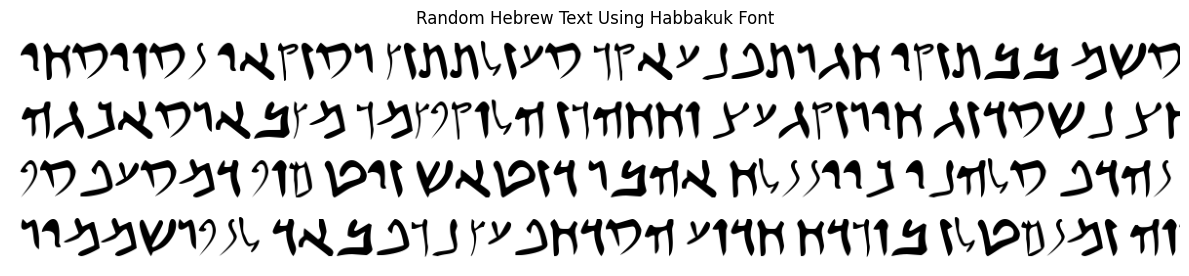

In [213]:
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image, ImageFont, ImageDraw

def generate_random_text_image(num_lines=10, chars_per_line=50, line_height=60, char_width=20, 
                              word_mean=7, word_sd=2, font_path='C:/Users/Gebruiker/Documents/CCS/DLP/Habbakuk.TTF', 
                              font_size=42):
    """
    Generate an image with random Hebrew characters with spaces inserted at intervals.
    
    Parameters:
    num_lines (int): Number of lines of text
    chars_per_line (int): Approximate number of characters per line
    line_height (int): Height of each line in pixels
    char_width (int): Average width of each character in pixels
    word_mean (int): Mean length of words
    word_sd (int): Standard deviation of word length
    font_path (str): Path to the font file
    font_size (int): Font size
    
    Returns:
    PIL.Image: The generated text image
    str: The generated text
    """
    # Get a list of character names for random selection
    char_names = list(char_map.keys())
    
    # Calculate image dimensions
    img_width = chars_per_line * char_width
    img_height = num_lines * line_height
    
    # Create a blank white image
    img = Image.new('L', (img_width, img_height), 255)
    draw = ImageDraw.Draw(img)
    
    # Load the font
    font = ImageFont.truetype(font_path, font_size)
    
    # Generate text and draw it on the image
    full_text = ""
    x_pos, y_pos = 10, 10  # Starting position
    
    for line in range(num_lines):
        x_pos = 10  # Reset x position for each new line
        chars_in_line = 0
        
        while chars_in_line < chars_per_line:
            # Determine length of next word using normal distribution
            word_length = max(1, int(np.random.normal(word_mean, word_sd)))
            
            # Generate a random word
            word = ""
            for _ in range(word_length):
                if chars_in_line >= chars_per_line:
                    break
                char_name = random.choice(char_names)
                char = char_map[char_name]
                word += char
                chars_in_line += 1
            
            # Draw the word
            draw.text((x_pos, y_pos + line * line_height), word, 0, font)
            
            # Update text and position
            full_text += word + " "
            left, top, right, bottom = font.getbbox(word)
            x_pos += right - left + 10  # Add space between words
            
            # Add a space after the word
            if chars_in_line < chars_per_line:
                chars_in_line += 3
    
    return img, full_text

# Generate the image with random Hebrew text
np.random.seed(42)  # For reproducibility
random_text_img, text = generate_random_text_image(
    num_lines=4,
    chars_per_line=60,  # Increased to have more words per line
    line_height=60,
    char_width=20,  # Reduced character width
    word_mean=7,
    word_sd=2
)

# Display the image
plt.figure(figsize=(12, 8))
plt.imshow(random_text_img, cmap='gray')
plt.title("Random Hebrew Text Using Habbakuk Font")
plt.axis('off')
plt.tight_layout()
plt.show()

# Save the image if needed
# random_text_img.save("random_hebrew_text.png")


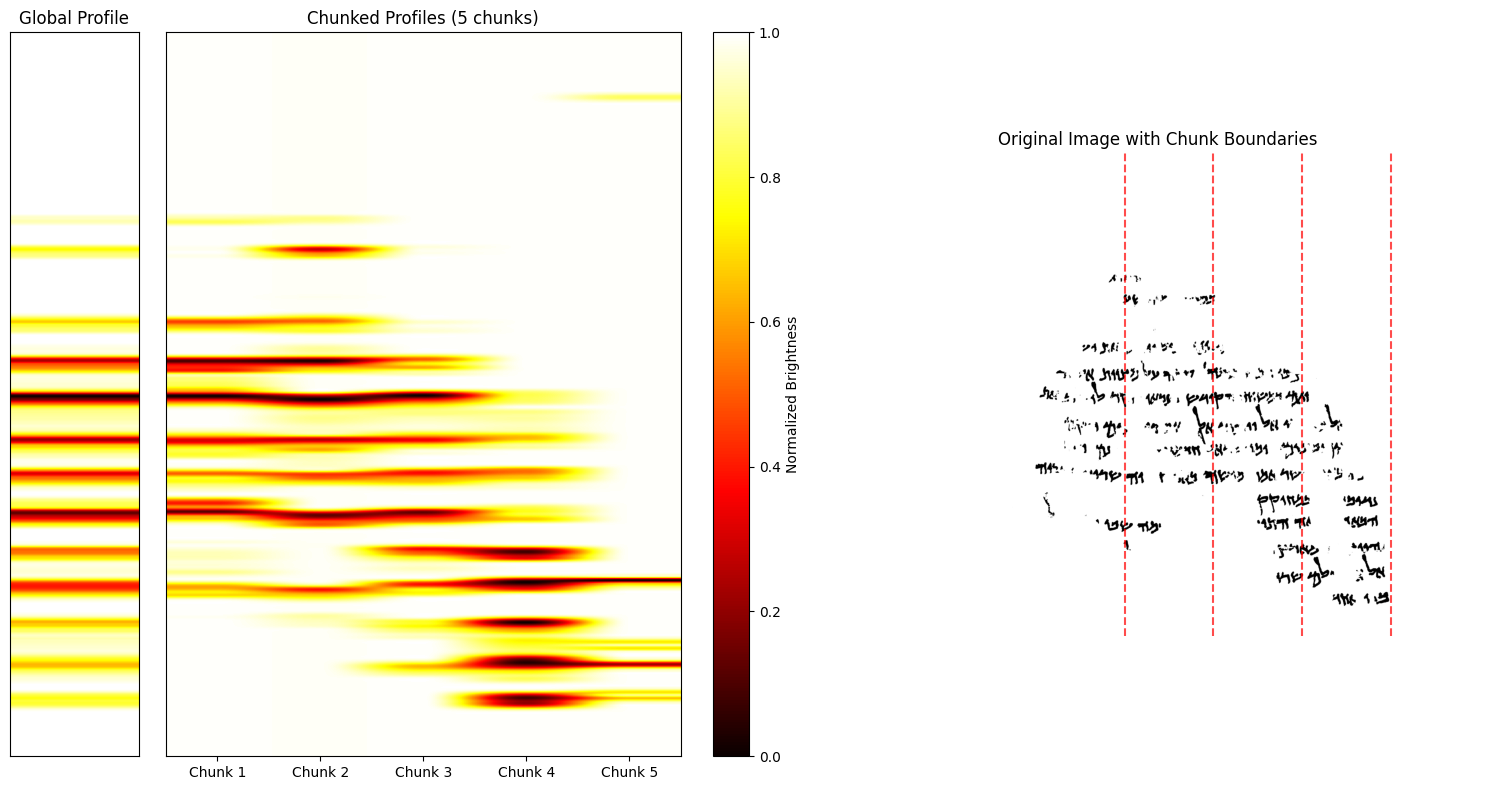

In [297]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter

def chunked_row_brightness_heatmap(image_path, num_chunks=5, smoothing_sigma=3):
    """
    Analyze row brightness in chunks with smoothing and display as heatmap.
    Chunking starts at the first column that contains a black pixel.
    
    Parameters:
        image_path: Path to the image file
        num_chunks: Number of horizontal chunks to divide the image into
        smoothing_sigma: Sigma value for Gaussian smoothing
    """
    # Load and convert to grayscale
    img = Image.open(image_path).convert("L")  # 'L' = 8-bit pixels, black and white
    img_array = np.array(img)
    
    # Get image dimensions
    height, width = img_array.shape

    # Find first column that contains a black pixel
    black_threshold = 128
    first_black_col = next((col for col in range(width) if np.any(img_array[:, col] < black_threshold)), 0)

    # Adjust the working width from that point onward
    adjusted_width = width - first_black_col
    chunk_width = adjusted_width // num_chunks
    
    # Create arrays to store results
    all_chunk_profiles = np.zeros((height, num_chunks))
    
    # Process each chunk
    for i in range(num_chunks):
        # Define chunk boundaries
        start_col = first_black_col + i * chunk_width
        end_col = min(first_black_col + (i + 1) * chunk_width, width)
        
        # Extract chunk
        chunk = img_array[:, start_col:end_col]
        
        # Sum pixel values across each row in this chunk
        chunk_row_sums = chunk.sum(axis=1)
        
        # Apply smoothing to reduce noise
        chunk_row_sums_smoothed = gaussian_filter1d(chunk_row_sums, sigma=smoothing_sigma)
        
        # Apply additional Savitzky-Golay filter for better smoothing
        window_size = min(25, len(chunk_row_sums) // 10)
        if window_size % 2 == 0:
            window_size += 1
        if window_size >= 5:
            chunk_row_sums_smoothed = savgol_filter(chunk_row_sums_smoothed, window_size, 3)
        
        # Normalize chunk profile to [0, 1]
        if chunk_row_sums_smoothed.ptp() > 0:
            normalized_profile = (chunk_row_sums_smoothed - chunk_row_sums_smoothed.min()) / chunk_row_sums_smoothed.ptp()
        else:
            normalized_profile = np.zeros_like(chunk_row_sums_smoothed)
        
        all_chunk_profiles[:, i] = normalized_profile
    
    # Global profile
    global_row_sums = img_array.sum(axis=1)
    global_row_sums_smoothed = gaussian_filter1d(global_row_sums, sigma=smoothing_sigma)
    global_normalized = (global_row_sums_smoothed - global_row_sums_smoothed.min()) / global_row_sums_smoothed.ptp()
    
    # Combined figure
    fig, axes = plt.subplots(1, 3, figsize=(15, 8), gridspec_kw={'width_ratios': [1, 5, 5]})
    
    # Global profile
    axes[0].imshow(global_normalized[:, np.newaxis], cmap='hot', aspect='auto')
    axes[0].set_title("Global Profile")
    axes[0].set_xticks([])
    axes[0].set_yticks([])
    
    # Chunked profiles
    im = axes[1].imshow(all_chunk_profiles, cmap='hot', aspect='auto')
    axes[1].set_title(f"Chunked Profiles ({num_chunks} chunks)")
    axes[1].set_xticks(np.arange(num_chunks))
    axes[1].set_xticklabels([f"Chunk {i+1}" for i in range(num_chunks)])
    axes[1].set_yticks([])
    plt.colorbar(im, ax=axes[1], label='Normalized Brightness')
    
    # Original image with chunk boundaries
    axes[2].imshow(img_array, cmap='gray')
    for i in range(1, num_chunks):
        x_pos = first_black_col + i * chunk_width
        axes[2].axvline(x=x_pos, color='r', linestyle='--', alpha=0.7)
    axes[2].set_title("Original Image with Chunk Boundaries")
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return all_chunk_profiles, global_normalized

# Directory and file setup
directory = r"C:\Users\Gebruiker\Documents\CCS\DLP\Seg_Images\image-data"
binarized_images = [f for f in os.listdir(directory) if f.endswith("binarized.jpg")]

# Process image
image_path = os.path.join(directory, binarized_images[0])
chunk_profiles, global_profile = chunked_row_brightness_heatmap(image_path, num_chunks=5, smoothing_sigma=3)


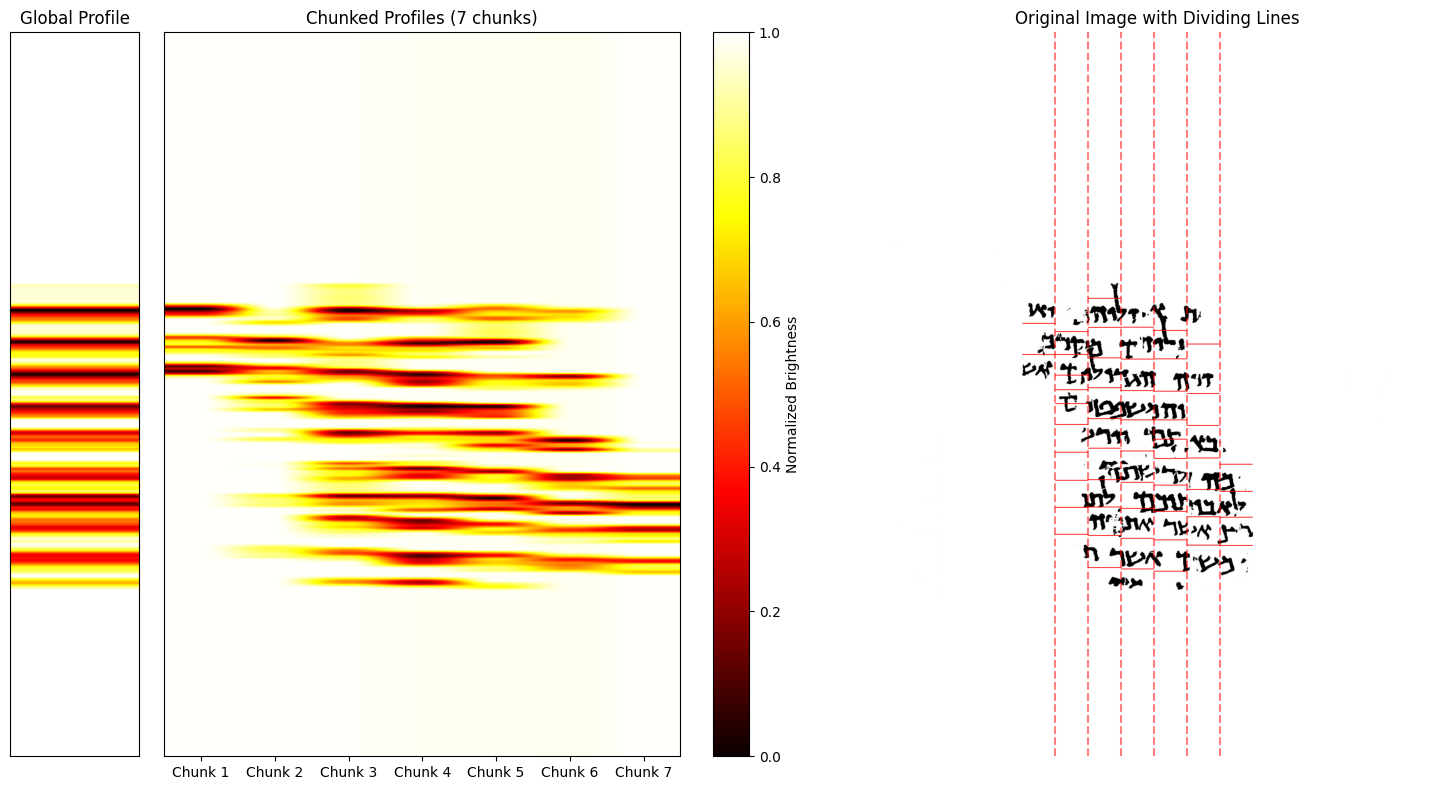

In [323]:
import os
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter

def chunked_brightness_and_minima(image_path, num_chunks=5, smoothing_sigma=3, N=80):
    """
    Analyze chunked row brightness and draw dividing lines at midpoints between local minima in each chunk.
    """
    # Load image and convert to grayscale
    img = Image.open(image_path).convert("L")
    img_array = np.array(img)
    height, width = img_array.shape

    # Find first and last column that contains a black pixel
    black_threshold = 128
    first_black_col = next((col for col in range(width) if np.any(img_array[:, col] < black_threshold)), 0)
    last_black_col = next((col for col in range(width-1, -1, -1) if np.any(img_array[:, col] < black_threshold)), width-1)
    
    # Define chunk dimensions based on the adjusted width
    adjusted_width = last_black_col - first_black_col + 1
    chunk_width = adjusted_width // num_chunks
    all_chunk_profiles = np.zeros((height, num_chunks))

    # Prepare image for drawing
    img_with_lines = img.convert("RGB")
    draw = ImageDraw.Draw(img_with_lines)

    # Analyze each chunk
    for i in range(num_chunks):
        start_col = first_black_col + i * chunk_width
        end_col = min(first_black_col + (i + 1) * chunk_width, width)

        chunk = img_array[:, start_col:end_col]
        chunk_row_sums = chunk.sum(axis=1)

        # Smooth and normalize
        smoothed = gaussian_filter1d(chunk_row_sums, sigma=smoothing_sigma)
        window_size = min(25, len(smoothed) // 10)
        if window_size % 2 == 0:
            window_size += 1
        if window_size >= 5:
            smoothed = savgol_filter(smoothed, window_size, 3)

        if smoothed.ptp() > 0:
            normalized = (smoothed - smoothed.min()) / smoothed.ptp()
        else:
            normalized = np.zeros_like(smoothed)

        all_chunk_profiles[:, i] = normalized

        # Find minima in the chunk profile
        minima = []
        for row in range(N, height - N):
            if all(normalized[row] < normalized[row - j] for j in range(1, N + 1)) and \
               all(normalized[row] < normalized[row + j] for j in range(1, N + 1)):
                minima.append(row)

        # Draw dividing lines between minima
        if len(minima) >= 2:
            for j in range(len(minima) - 1):
                midpoint = (minima[j] + minima[j + 1]) // 2
                draw.line([(start_col, midpoint), (end_col, midpoint)], fill=(255, 0, 0), width=4)

    # Global brightness profile
    global_row_sums = img_array.sum(axis=1)
    global_smoothed = gaussian_filter1d(global_row_sums, sigma=smoothing_sigma)
    global_normalized = (global_smoothed - global_smoothed.min()) / global_smoothed.ptp()

    # Plot heatmaps and final image
    fig, axes = plt.subplots(1, 3, figsize=(15, 8), gridspec_kw={'width_ratios': [1, 5, 5]})

    axes[0].imshow(global_normalized[:, np.newaxis], cmap='hot', aspect='auto')
    axes[0].set_title("Global Profile")
    axes[0].set_xticks([])
    axes[0].set_yticks([])

    im = axes[1].imshow(all_chunk_profiles, cmap='hot', aspect='auto')
    axes[1].set_title(f"Chunked Profiles ({num_chunks} chunks)")
    axes[1].set_xticks(np.arange(num_chunks))
    axes[1].set_xticklabels([f"Chunk {i+1}" for i in range(num_chunks)])
    axes[1].set_yticks([])
    plt.colorbar(im, ax=axes[1], label='Normalized Brightness')

    axes[2].imshow(img_with_lines)
    for i in range(1, num_chunks):
        x_pos = first_black_col + i * chunk_width
        axes[2].axvline(x=x_pos, color='red', linestyle='--', alpha=0.5)
    axes[2].set_title("Original Image with Dividing Lines")
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

    return all_chunk_profiles, global_normalized, img_with_lines

# Directory and file setup
directory = r"C:\Users\Gebruiker\Documents\CCS\DLP\Seg_Images\image-data"
binarized_images = [f for f in os.listdir(directory) if f.endswith("binarized.jpg")]

# Process selected image
image_path = os.path.join(directory, binarized_images[6])
chunk_profiles, global_profile, annotated_image = chunked_brightness_and_minima(
    image_path, num_chunks=7, smoothing_sigma=3, N=50
)


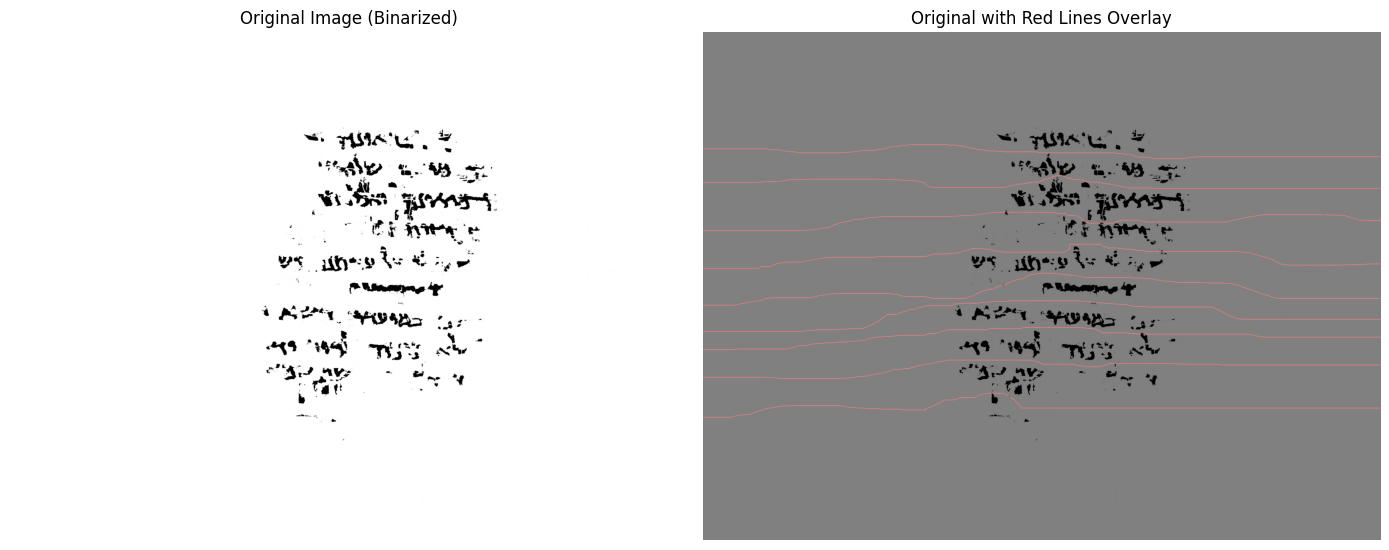

In [409]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
#Dead end, ignore this cell
# Load images
directory = r"C:\Users\Gebruiker\Documents\CCS\DLP\Seg_Images\image-data"
image_path = os.path.join(directory, "labelledfg006.jpg")
image_path2 = os.path.join(directory, "P21-Fg006-R-C01-R01-binarized.jpg")

img1 = Image.open(image_path)
img2 = Image.open(image_path2)

# Convert images to numpy arrays for processing
img1_np = np.array(img1)
img2_np = np.array(img2)

# Define the red color (RGB values for red)
red = np.array([255, 0, 0])

# Create a mask for red lines by comparing the pixels to red
red_mask = np.sqrt(np.sum((img1_np - red) ** 2, axis=2)) < 150  # Thresholding to find red pixels

# Create an empty mask for red lines on the original image (binary mask)
red_line_overlay = np.zeros_like(img2_np, dtype=np.uint8)

# Assign the red color (255, 0, 0) to the red pixels
red_line_overlay[red_mask] = [255, 0, 0]

# Plot the original and the overlayed images side by side
plt.figure(figsize=(14, 8))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(img2)
plt.axis('off')
plt.title("Original Image (Binarized)")

# Display the original image with the red line overlay
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.imshow(red_line_overlay, alpha=0.5)  # Overlay red lines with some transparency
plt.axis('off')
plt.title("Original with Red Lines Overlay")

plt.tight_layout()
plt.show()


Stopping early after filling 2361237 white pixels (~100.00%)
Found 67 white regions


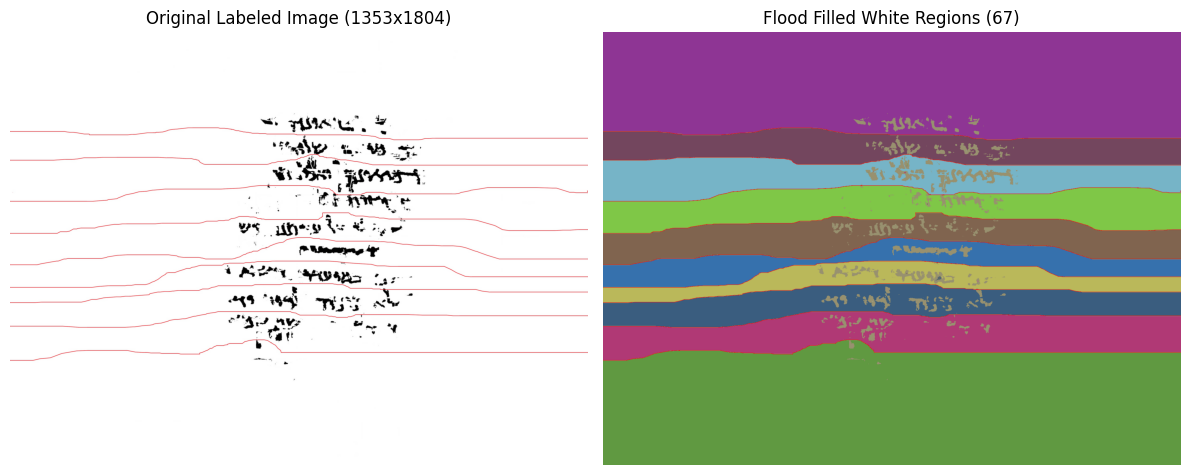

In [361]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
from collections import defaultdict
#Did not work well, we can ignore this cell
def fast_floodfill_white_regions(image_path, fill_percentage=0.8, downscale_factor=0.1):
    img = np.array(Image.open(image_path))

    # Downscale the image by the given factor
    img = Image.fromarray(img)
    new_size = (int(img.width * downscale_factor), int(img.height * downscale_factor))
    img = img.resize(new_size, Image.Resampling.LANCZOS)  # Updated line
    img = np.array(img)

    # Define colors
    red = np.array([255, 0, 0])
    white = np.array([255, 255, 255])

    # Mask for red lines and white pixels
    red_mask = np.sqrt(np.sum((img - red) ** 2, axis=2)) < 150
    white_mask = np.sqrt(np.sum((img - white) ** 2, axis=2)) < 150

    # Prepare gray image: white = 255, red = 0 (barrier), black = 0
    mask_gray = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
    mask_gray[white_mask] = 255
    mask_gray[red_mask] = 0

    # Create empty label image
    labeled_img = np.zeros_like(mask_gray, dtype=np.int32)
    flood_mask = np.zeros((img.shape[0] + 2, img.shape[1] + 2), dtype=np.uint8)

    # Track filled pixels and total white pixels
    total_white = np.sum(white_mask)
    filled_count = 0

    region_id = 1
    h, w = mask_gray.shape

    for y in range(h):
        for x in range(w):
            # If this pixel is white and hasn't been filled yet
            if mask_gray[y, x] == 255 and labeled_img[y, x] == 0:
                flood_mask[:] = 0
                # Flood fill in-place (set value to region_id)
                tmp_img = mask_gray.copy()
                cv2.floodFill(tmp_img, flood_mask, (x, y), region_id, flags=cv2.FLOODFILL_FIXED_RANGE)
                labeled_img[tmp_img == region_id] = region_id
                region_id += 1

                # Count the newly filled white pixels
                new_filled = np.sum(tmp_img == region_id - 1)
                filled_count += new_filled

                # Stop if we've filled at least the specified percentage of white pixels
                if filled_count >= fill_percentage * total_white:
                    print(f"Stopping early after filling {filled_count} white pixels (~{100 * filled_count / total_white:.2f}%)")
                    break
        else:
            continue
        break

    num_regions = region_id - 1
    print(f"Found {num_regions} white regions")

    # Color the labeled image
    np.random.seed(42)
    colors = np.random.randint(50, 200, size=(region_id, 3), dtype=np.uint8)
    colored = colors[labeled_img]

    # Overlay red lines again
    colored[red_mask] = [255, 0, 0]

    # Plot the result
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(f"Original Labeled Image ({img.shape[0]}x{img.shape[1]})")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(colored)
    plt.title(f"Flood Filled White Regions ({num_regions})")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

    return {
        "labeled_image": img,
        "region_labels": labeled_img,
        "colored_output": colored,
        "num_regions": num_regions
    }

# Main execution
directory = r"C:\Users\Gebruiker\Documents\CCS\DLP\Seg_Images\image-data"
image_path = os.path.join(directory, "labelledfg006.jpg")

# Run the visualization with the 80% fill rule and downscale by 10%
results = fast_floodfill_white_regions(image_path, fill_percentage=0.8, downscale_factor=0.5)


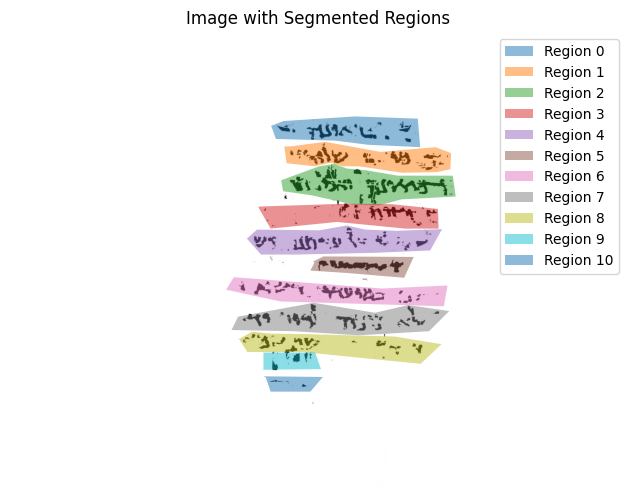

In [433]:
import pandas as pd
import pandas as pd
import json
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path

# Load the CSV file into a pandas DataFrame
csv_file = 'C:/Users/Gebruiker/Downloads/dummylabel.csv'  # replace with the correct path to your CSV file
df = pd.read_csv(csv_file)

# Parse the region shape attributes to extract coordinates
df['region_shape_attributes'] = df['region_shape_attributes'].apply(json.loads)

# Extract coordinates for each region (x and y points)
df['all_points_x'] = df['region_shape_attributes'].apply(lambda x: x.get('all_points_x'))
df['all_points_y'] = df['region_shape_attributes'].apply(lambda x: x.get('all_points_y'))

# Inspect the first few rows of the dataframe
# Load the original image 
image_path = 'C:/Users/Gebruiker/Documents/CCS/DLP/Seg_Images/image-data/P21-Fg006-R-C01-R01-binarized.jpg' 
img = Image.open(image_path)
img_np = np.array(img)

# Set up the plot
plt.figure(figsize=(10, 6))
plt.imshow(img_np)
plt.axis('off')

# Plot each region (polygon) with a different color
for index, row in df.iterrows():
    x_coords = row['all_points_x']
    y_coords = row['all_points_y']

    # Create a Path object for the region (polygon)
    region_path = Path(list(zip(x_coords, y_coords)))

    # Plot the polygon (region) as a closed shape with some transparency
    plt.fill(x_coords, y_coords, alpha=0.5, label=f"Region {row['region_id']}")

# Show the image with the overlaid regions
plt.legend()
plt.title("Image with Segmented Regions")
plt.show()


In [455]:
import os
import json
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib.path import Path
import matplotlib.pyplot as plt


# 1) Function to find minima and midpoints
def find_midpoints(img_array, N):
    row_sums = img_array.sum(axis=1)
    rsn = (row_sums - row_sums.min()) / (row_sums.ptp() + 1e-8)
    minima = [i for i in range(N, len(rsn)-N)
              if all(rsn[i]<rsn[i-j] for j in range(1,N+1))
              and all(rsn[i]<rsn[i+j] for j in range(1,N+1))]
    midpts = [ (minima[i]+minima[i+1])//2 for i in range(len(minima)-1) ]
    return minima, midpts

# 2) Function to load manual labels from CSV and build a per-pixel region_id map
def create_region_map(img, csv_file):
    df = pd.read_csv(csv_file)
    df['region_shape_attributes'] = df['region_shape_attributes'].apply(json.loads)
    df['xs'] = df['region_shape_attributes'].apply(lambda d: d['all_points_x'])
    df['ys'] = df['region_shape_attributes'].apply(lambda d: d['all_points_y'])

    H, W = img.shape
    region_map = np.zeros((H,W), dtype=int)

    for _, row in df.iterrows():
        pid = int(row['region_id'])
        poly = Path(list(zip(row['xs'], row['ys'])))
        # test all pixel centers
        coords = np.vstack(np.meshgrid(np.arange(W), np.arange(H))).reshape(2,-1).T
        mask = poly.contains_points(coords).reshape(H,W)
        region_map[mask] = pid + 1  # +1 so background stays 0

    return region_map

# 3) Function to determine the "true" line index for each region_id by vertical ordering
def get_line_idx_of_regions(region_map):
    region_ids = np.unique(region_map)
    region_ids = region_ids[region_ids > 0]
    means = { rid: np.mean(np.where(region_map == rid)[0]) for rid in region_ids }
    ordered = sorted(region_ids, key=lambda rid: means[rid])
    line_idx_of = { rid: i for i, rid in enumerate(ordered) }
    return line_idx_of

# 4) Function to compute accuracy on valid pixels
def compute_accuracy(img, region_map, midpts, line_idx_of, N, classifier):
    black = img < 128
    valid_mask = black & (region_map > 0)
    ys, xs = np.nonzero(valid_mask)

    # predicted_line based on the classifier (either the line classifier or dummy classifier)
    pred_lines = np.array([classifier(y, midpts) for y in ys])

    # true_lines now only for valid pixels
    true_lines = np.array([line_idx_of[region_map[y, x]] for y, x in zip(ys, xs)])

    # Compute accuracy on valid pixels
    correct = (pred_lines == true_lines)
    accuracy = correct.mean()
    
    return ys, xs, correct, accuracy

# Line classifier function: Predicts the line number for a given y-coordinate
def line_classifier(y, midpts):
    return np.sum(y > np.array(midpts))

# Dummy classifier function: Always predicts the first line (or some other simple strategy)
def dummy_classifier(y, midpts):
    return 0  # Predicting the first line regardless of the y-coordinate

# Main function to run the entire process
def main(image_name, csv_file, N=80, classifier=line_classifier):
    # Load the image
    img = np.array(Image.open(os.path.join(directory, image_name)).convert("L"))

    # Step 1: Find midpoints and minima
    minima, midpts = find_midpoints(img, N)

    # Step 2: Create the region map from manual annotations
    region_map = create_region_map(img, csv_file)

    # Step 3: Get line index for each region
    line_idx_of = get_line_idx_of_regions(region_map)

    # Step 4: Compute accuracy
    ys, xs, correct, accuracy = compute_accuracy(img, region_map, midpts, line_idx_of, N, classifier)
    # Print accuracy
    print(f"Pixel-wise line accuracy: {accuracy * 100:.2f}% "
          f"(N={N}, {len(np.unique(region_map))} lines, {len(ys)} pixels inside regions)")
# ——— PARAMETERS ——————————————————————————————————————————————————————————————
directory        = r"C:\Users\Gebruiker\Documents\CCS\DLP\Seg_Images\image-data"
image_name       = "P21-Fg006-R-C01-R01-binarized.jpg"
csv_file = 'C:/Users/Gebruiker/Downloads/dummylabel.csv' 

N                = 80                                 # Neighbourhood window (when identifying local minima
# ———————————————————————————————————————————————————————————————————————————

# Run the main function with line classifier
print("Using Line Classifier:")
main(image_name, csv_file, N, classifier=line_classifier)

# Run the main function with dummy classifier
print("\nUsing Dummy Classifier:")
main(image_name, csv_file, N, classifier=dummy_classifier)


Using Line Classifier:
Pixel-wise line accuracy: 96.93% (N=80, 12 lines, 179706 pixels inside regions)

Using Dummy Classifier:
Pixel-wise line accuracy: 8.82% (N=80, 12 lines, 179706 pixels inside regions)
